In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import imdb
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [58]:
data = np.load('imdb.npz', allow_pickle = True)
print(data.files)

['x_test', 'x_train', 'y_train', 'y_test']


In [60]:
train_data = data['x_train']
train_label = data['y_train']
test_data = data['x_test']
test_label = data['y_test']

In [80]:
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        
        sequence = [min(word, dimensions-1) for word in sequence]
        
        results[i,sequence] = 1
    return results

In [82]:
xtrain = vectorize_sequences(train_data)
xtest = vectorize_sequences(test_data)

In [84]:
ytrain = np.asarray(train_label).astype('float32')
ytest = np.asarray(test_label).astype('float32')

In [86]:
xtrain[0], xtrain.shape

(array([0., 1., 1., ..., 0., 0., 1.]), (25000, 10000))

In [88]:
model = Sequential()

model.add(Dense(16, input_shape=(10000, ), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

C:\Users\heman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.compile(optimizer='adam', loss="mse", metrics=['mae'])

In [92]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
x_val = xtrain[:10000]
partial_xtrain = xtrain[10000:]

y_val = ytrain[:10000]
partial_ytrain = ytrain[10000:]

history = model.fit(xtrain, ytrain, validation_split = 0.3, epochs=20, verbose=1, batch_size=512)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2126 - mae: 0.4315 - val_loss: 0.3745 - val_mae: 0.6081
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1455 - mae: 0.3373 - val_loss: 0.2482 - val_mae: 0.4725
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0860 - mae: 0.2331 - val_loss: 0.1840 - val_mae: 0.3492
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0525 - mae: 0.1533 - val_loss: 0.1591 - val_mae: 0.2919
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0370 - mae: 0.1160 - val_loss: 0.1638 - val_mae: 0.2816
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0280 - mae: 0.0932 - val_loss: 0.1468 - val_mae: 0.2478
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0224 - mae: 0.0782 - val_loss: 0.1596 - val_mae: 0.2536
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0162 - mae: 0.0640 - val_loss: 0.1569 - val_mae: 0.2418
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.013

In [96]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

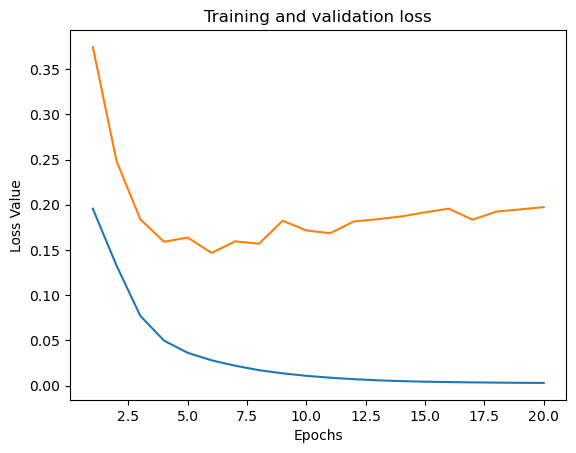

In [104]:
loss_value = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_value)+1)

plt.plot(epochs, loss_value)

plt.plot(epochs, val_loss_values)

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")

plt.show()

In [100]:
np.set_printoptions(suppress=True)
result = model.predict(xtest)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [102]:
print(result)

[[0.9983907 ]
 [0.99998736]
 [0.99952906]
 ...
 [0.94623876]
 [0.97877884]
 [0.9997001 ]]
